In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **IMPORT DATASET**

In [334]:
df= pd.read_csv("data2/Dataset_spine.csv")


In [335]:
print(df.head())

   pelvic incidence   pelvic tilt   lumbar lordosis angle   pelvic radius  \
0         63.027817     22.552586               39.609117       98.672917   
1         39.056951     10.060991               25.015378      114.405425   
2         68.832021     22.218482               50.092194      105.985135   
3         69.297008     24.652878               44.311238      101.868495   
4         49.712859      9.652075               28.317406      108.168725   

    grade of spondylolisthesis Class_att  
0                    -0.254400  Abnormal  
1                     4.564259  Abnormal  
2                    -3.530317  Abnormal  
3                    11.211523  Abnormal  
4                     7.918501  Abnormal  


# **Data Cleanning**

In [336]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pelvic incidence             310 non-null    float64
 1    pelvic tilt                 310 non-null    float64
 2    lumbar lordosis angle       310 non-null    float64
 3    pelvic radius               310 non-null    float64
 4    grade of spondylolisthesis  310 non-null    float64
 5   Class_att                    310 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.7+ KB
None


In [337]:
df.isnull().sum()

pelvic incidence               0
 pelvic tilt                   0
 lumbar lordosis angle         0
 pelvic radius                 0
 grade of spondylolisthesis    0
Class_att                      0
dtype: int64

In [338]:
df = df.dropna()

In [339]:
df.duplicated().sum()

0

In [340]:
df.dtypes

pelvic incidence               float64
 pelvic tilt                   float64
 lumbar lordosis angle         float64
 pelvic radius                 float64
 grade of spondylolisthesis    float64
Class_att                       object
dtype: object

In [341]:
df['Class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [342]:
df['Class_att'] = df['Class_att'].map({'Abnormal': 1,'Normal': 0 })

In [343]:
X = df.drop('Class_att', axis=1).values             
y = df['Class_att'].values.reshape(-1, 1)


# **Logistic Regression**

In [344]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_b = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_b = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])




In [345]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [346]:

def costFunction(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))   
    epsilon = 1e-5
    cost = -1/m * np.sum(y*np.log(h + epsilon) + (1-y)*np.log(1-h + epsilon))
    return cost


In [347]:
print(costFunction(X_train_b, y_train, theta))

0.3536918359961977


In [348]:
def gradient_descent(X, y, lr=0.05, num_iter=1000):
    theta = np.zeros(X.shape[1])
    cost_history = []
    for i in range(num_iter):
        h = sigmoid(X.dot(theta))
        gradient = (1 / len(y)) * X.T.dot(h - y)
        theta -= lr * gradient
        cost = cost_function(theta, X, y)
        cost_history.append(cost)
        if i % 100 == 0 or i == num_iter - 1:
            print(f"Iteration {i}, Cost: {cost}")
    return theta, cost_history


In [349]:
theta, cost_history = gradient_descent(X_train_b, y_train, lr=0.05, num_iter=1000)

Iteration 0, Cost: 0.6849017652288635
Iteration 100, Cost: 0.4841441104346037
Iteration 200, Cost: 0.4447946311161255
Iteration 300, Cost: 0.42234146775807185
Iteration 400, Cost: 0.4060145080213482
Iteration 500, Cost: 0.393065267306974
Iteration 600, Cost: 0.3824100861916169
Iteration 700, Cost: 0.3734674230844288
Iteration 800, Cost: 0.3658611628831389
Iteration 900, Cost: 0.35932349866958563
Iteration 999, Cost: 0.3537072553414792


In [350]:
theta

array([ 1.36065006, -0.34965362,  0.80233847, -0.16935043, -0.82661939,
        2.3958985 ])

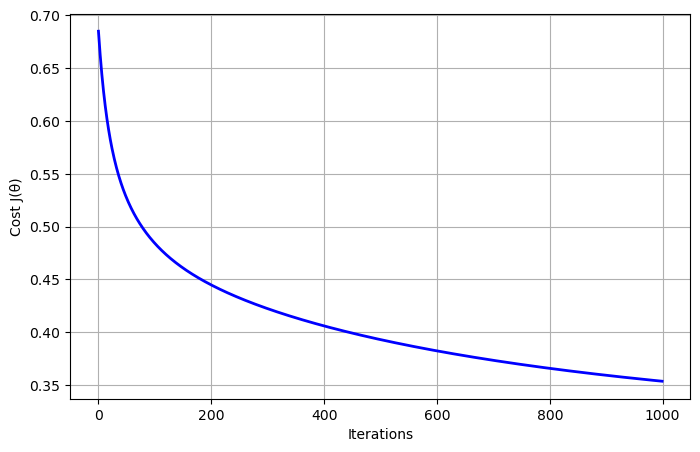

In [351]:
plt.figure(figsize=(8,5))
plt.plot(range(len(cost_history)), cost_history, color="blue", linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.grid(True)
plt.show()

In [352]:
probs = sigmoid(X_test_b.dot(theta))
y_pred = (probs >= 0.5).astype(int)

In [353]:
print("First predictions:", y_pred[:10])
print("True labels:", y_test[:10])
print("Test accuracy:", np.mean(y_pred == y_test))


First predictions: [0 1 1 1 1 1 1 1 1 1]
True labels: [0 1 1 1 1 1 1 1 0 1]
Test accuracy: 0.8709677419354839
